In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode

**Cargar datos**

In [2]:
df = pd.read_csv('ventas.csv')
df

,cliente,cantidad,precio,total_venta
0,Juan Perez,5.0,100.00,500.00
1,JUAN PÉREZ,5.0,100.00,500.00
2,juan p.,5.0,100.00,500.00
3,Maria Gómez,2.0,500.00,1000.00
4,María Gómez,2.0,500.00,1000.00
5,Carlos Lòpez,10000.0,100.00,1000000.00
6,Pedro,NaN,150.00,NaN
7,Ana Torres,3.0,0.01,0.03
8,anA torres,3.0,1000.00,3000.00
9,Laura,2.0,NaN,200.00


**Información de los datos**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente      13 non-null     object 
 1   cantidad     12 non-null     float64
 2   precio       12 non-null     float64
 3   total_venta  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 548.0+ bytes


**Filas y columnas del DatFrame**

In [4]:
filas, columnas = df.shape
print(f'Cantidad de Filas: {filas}\nCantidad de Columnas: {columnas}')

Cantidad de Filas: 13
Cantidad de Columnas: 4


**Errores de entrada**

**1. Valores únicos sospechosos**

In [5]:
nombre_cliente = df['cliente'].value_counts()
nombre_cliente

cliente
Jose            2
Juan Perez      1
juan p.         1
JUAN PÉREZ      1
Maria Gómez     1
María Gómez     1
Pedro           1
Carlos Lòpez    1
Ana Torres      1
anA torres      1
Laura           1
Jòsé            1
Name: count, dtype: int64

**2. Normalización básica del texto**

In [6]:
df['nombre_normalizado'] = df['cliente'].str.lower()  # o .str.upper()
df['nombre_normalizado'] = df['nombre_normalizado'].apply(unidecode.unidecode)
df['nombre_normalizado'] = df['nombre_normalizado'].str.strip()

**3. Agrupación por similitud de texto (fuzzy matching)**

In [7]:
nombre_normalizados = df['nombre_normalizado'].value_counts()
nombre_normalizados

nombre_normalizado
jose            3
juan perez      2
ana torres      2
maria gomez     2
carlos lopez    1
juan p.         1
pedro           1
laura           1
Name: count, dtype: int64

**4. Visualización de frecuencias**

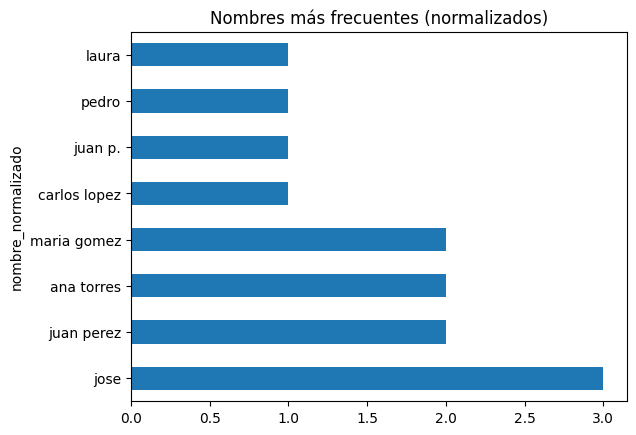

In [8]:
df['nombre_normalizado'].value_counts().head(10).plot(kind='barh')
plt.title("Nombres más frecuentes (normalizados)")
plt.show()

**5.-Correcciones**

In [9]:
correcciones = {
    'laura': 'Laura',
    'juan p.':'Juan Pérez',
    'carlos lopez':'Carlos López',
    'maria gomez':'María Gómez',
    'ana torres':'Ana Torres',
    'juan perez':'Juan Pérez',
    'jose':'José'
}

df['cliente'] = df['nombre_normalizado'].replace(correcciones)
df = df.drop(columns=['nombre_normalizado'])
df

,cliente,cantidad,precio,total_venta
0,Juan Pérez,5.0,100.00,500.00
1,Juan Pérez,5.0,100.00,500.00
2,Juan Pérez,5.0,100.00,500.00
3,María Gómez,2.0,500.00,1000.00
4,María Gómez,2.0,500.00,1000.00
5,Carlos López,10000.0,100.00,1000000.00
6,pedro,NaN,150.00,NaN
7,Ana Torres,3.0,0.01,0.03
8,Ana Torres,3.0,1000.00,3000.00
9,Laura,2.0,NaN,200.00


**6.-Corrovoramos las correcciones**

In [10]:
nombre_cliente = df['cliente'].value_counts()
nombre_cliente

cliente
Juan Pérez      3
José            3
María Gómez     2
Ana Torres      2
Carlos López    1
pedro           1
Laura           1
Name: count, dtype: int64

**Valores faltentes**

In [11]:
valores_nulos = df.isnull().sum()
print(f'Cantidad de valores nulos\n{valores_nulos}')

Cantidad de valores nulos
cliente        0
cantidad       1
precio         1
total_venta    1
dtype: int64


**Identificar las filas con valores faltantes**

In [13]:
filas_nulas = df[df.isnull().any(axis=1)]
print(f'Filas con valores nulos')
filas_nulas

Filas con valores nulos


,cliente,cantidad,precio,total_venta
6,pedro,NaN,150.0,NaN
9,Laura,2.0,NaN,200.0


Corregir valor nulo (En este caso se puede realizar ya que se cuenta con la información necesaria)

In [16]:
df.loc[9,'precio'] = 100
print('Verificamos los cambios')
df.loc[9]

Verificamos los cambios


cliente        Laura
cantidad         2.0
precio         100.0
total_venta    200.0
Name: 9, dtype: object

Eliminar valores nulos(En esteco se eliminan valoes nulos ya que no es posible corregirlos con valores correctos)

In [18]:
df = df.dropna()

**Verificamos los valores nulos**

In [20]:
print(f'Cantidad de valores nulos\n{df.isnull().sum()}')
print(f'\nFilas con valores nulos\n{df[df.isnull().any(axis=1)]}')

Cantidad de valores nulos
cliente        0
cantidad       0
precio         0
total_venta    0
dtype: int64

Filas con valores nulos
Empty DataFrame
Columns: [cliente, cantidad, precio, total_venta]
Index: []


**Identificar valores Duplicados**

In [21]:
valores_duplicados = df.duplicated().sum()
print(f'Cantidad de valores duplicados\n{valores_duplicados}')

Cantidad de valores duplicados
5


Identificar filas con lo valores duplicados

In [22]:
filas_duplicadas = df[df.duplicated(keep=False)]
print('Filas duplicadas')
filas_duplicadas

Filas duplicadas


,cliente,cantidad,precio,total_venta
0,Juan Pérez,5.0,100.0,500.0
1,Juan Pérez,5.0,100.0,500.0
2,Juan Pérez,5.0,100.0,500.0
3,María Gómez,2.0,500.0,1000.0
4,María Gómez,2.0,500.0,1000.0
10,José,2.0,120.0,240.0
11,José,2.0,120.0,240.0
12,José,2.0,120.0,240.0



Eliminar valores duplicados

In [23]:
df = df.drop_duplicates()

**Verificar los valores duplicados**

In [24]:
print(f'Cantidad de valores duplicados\n{df.duplicated().sum()}')

Cantidad de valores duplicados
0


In [25]:
df

,cliente,cantidad,precio,total_venta
0,Juan Pérez,5.0,100.00,500.00
3,María Gómez,2.0,500.00,1000.00
5,Carlos López,10000.0,100.00,1000000.00
7,Ana Torres,3.0,0.01,0.03
8,Ana Torres,3.0,1000.00,3000.00
9,Laura,2.0,100.00,200.00
10,José,2.0,120.00,240.00


**Crear columnas calculado y defierencia para corroborar los valores numéricos**

In [26]:
df['calculado'] = df['cantidad'] * df['precio']
df['diferencia'] = df['calculado'] - df['total_venta']
df

,cliente,cantidad,precio,total_venta,calculado,diferencia
0,Juan Pérez,5.0,100.00,500.00,500.00,0.0
3,María Gómez,2.0,500.00,1000.00,1000.00,0.0
5,Carlos López,10000.0,100.00,1000000.00,1000000.00,0.0
7,Ana Torres,3.0,0.01,0.03,0.03,0.0
8,Ana Torres,3.0,1000.00,3000.00,3000.00,0.0
9,Laura,2.0,100.00,200.00,200.00,0.0
10,José,2.0,120.00,240.00,240.00,0.0


**Errores numéricos**

In [ ]:
maximo_cantidad = df['cantidad'].max()
minimo_cantidad = df['cantidad'].min()
print(f'Cantidad\nValor Maximo: {maximo_cantidad}\nValor Mínimo: {minimo_cantidad}')

Cantidad
Valor Maximo: 10000.0
Valor Mínimo: 2.0


Se encontro una 'valor' sospechosa en la calumna 'cantidad'

In [28]:
cantidad_inusual = df[df['cantidad'] == 10000.0]
cantidad_inusual

,cliente,cantidad,precio,total_venta,calculado,diferencia
5,Carlos López,10000.0,100.0,1000000.0,1000000.0,0.0


Los datos son correctos, como tal la cantidad es inusual pero si es posible.

In [21]:
maximo_precio = df['precio'].max()
minimo_precio = df['precio'].min()
print(f'Precio\nValor Máximo: {maximo_precio}\nValor Mínimo: {minimo_precio}')

Precio
Valor Máximo: 1000.0
Valor Mínimo: 0.01


Se contro un 'valor' inusual en la columna 'precio'

In [29]:
inusual_precio = df[df['precio'] == 0.01]
inusual_precio

,cliente,cantidad,precio,total_venta,calculado,diferencia
7,Ana Torres,3.0,0.01,0.03,0.03,0.0


Se corrige el valor de la columa 'precio' y por consiguiente la columnas 'total_venta'

In [31]:
df.loc[7,'precio'] = 200
df.loc[7,'total_venta'] = 600
df

,cliente,cantidad,precio,total_venta,calculado,diferencia
0,Juan Pérez,5.0,100.0,500.0,500.00,0.0
3,María Gómez,2.0,500.0,1000.0,1000.00,0.0
5,Carlos López,10000.0,100.0,1000000.0,1000000.00,0.0
7,Ana Torres,3.0,200.0,600.0,0.03,0.0
8,Ana Torres,3.0,1000.0,3000.0,3000.00,0.0
9,Laura,2.0,100.0,200.0,200.00,0.0
10,José,2.0,120.0,240.0,240.00,0.0


**Verificamos los valores númericos**

In [32]:
df['calculado'] = df['cantidad'] * df['precio']
df['diferencia'] = df['calculado'] - df['total_venta']
df

,cliente,cantidad,precio,total_venta,calculado,diferencia
0,Juan Pérez,5.0,100.0,500.0,500.0,0.0
3,María Gómez,2.0,500.0,1000.0,1000.0,0.0
5,Carlos López,10000.0,100.0,1000000.0,1000000.0,0.0
7,Ana Torres,3.0,200.0,600.0,600.0,0.0
8,Ana Torres,3.0,1000.0,3000.0,3000.0,0.0
9,Laura,2.0,100.0,200.0,200.0,0.0
10,José,2.0,120.0,240.0,240.0,0.0


**Detectar outliers**

In [ ]:
Q1 = df['columna'].quantile(0.25)
Q3 = df['columna'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['columna'] < Q1 - 1.5 * IQR) | (df['columna'] > Q3 + 1.5 * IQR)]


In [34]:
print("--- Detección de Outliers usando IQR ---")
Q1 = df['cantidad'].quantile(0.25)
Q3 = df['cantidad'].quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar outliers
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['cantidad'] < lower_bound_iqr) | (df['cantidad'] > upper_bound_iqr)]

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Límite Inferior (IQR): {lower_bound_iqr:.2f}")
print(f"Límite Superior (IQR): {upper_bound_iqr:.2f}")
print("Outliers detectados por IQR:")
outliers_iqr

--- Detección de Outliers usando IQR ---
Q1: 2.00, Q3: 4.00, IQR: 2.00
Límite Inferior (IQR): -1.00
Límite Superior (IQR): 7.00
Outliers detectados por IQR:


,cliente,cantidad,precio,total_venta,calculado,diferencia
5,Carlos López,10000.0,100.0,1000000.0,1000000.0,0.0


In [35]:
print("--- Detección de Outliers usando IQR ---")
Q1 = df['precio'].quantile(0.25)
Q3 = df['precio'].quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar outliers
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['precio'] < lower_bound_iqr) | (df['precio'] > upper_bound_iqr)]

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Límite Inferior (IQR): {lower_bound_iqr:.2f}")
print(f"Límite Superior (IQR): {upper_bound_iqr:.2f}")
print("Outliers detectados por IQR:")
outliers_iqr

--- Detección de Outliers usando IQR ---
Q1: 100.00, Q3: 350.00, IQR: 250.00
Límite Inferior (IQR): -275.00
Límite Superior (IQR): 725.00
Outliers detectados por IQR:


,cliente,cantidad,precio,total_venta,calculado,diferencia
8,Ana Torres,3.0,1000.0,3000.0,3000.0,0.0


In [36]:
print("--- Detección de Outliers usando IQR ---")
Q1 = df['total_venta'].quantile(0.25)
Q3 = df['total_venta'].quantile(0.75)
IQR = Q3 - Q1

# Límites para identificar outliers
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

outliers_iqr = df[(df['total_venta'] < lower_bound_iqr) | (df['total_venta'] > upper_bound_iqr)]

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Límite Inferior (IQR): {lower_bound_iqr:.2f}")
print(f"Límite Superior (IQR): {upper_bound_iqr:.2f}")
print("Outliers detectados por IQR:")
outliers_iqr

--- Detección de Outliers usando IQR ---
Q1: 370.00, Q3: 2000.00, IQR: 1630.00
Límite Inferior (IQR): -2075.00
Límite Superior (IQR): 4445.00
Outliers detectados por IQR:


,cliente,cantidad,precio,total_venta,calculado,diferencia
5,Carlos López,10000.0,100.0,1000000.0,1000000.0,0.0


**Visualizaciones de outliers**

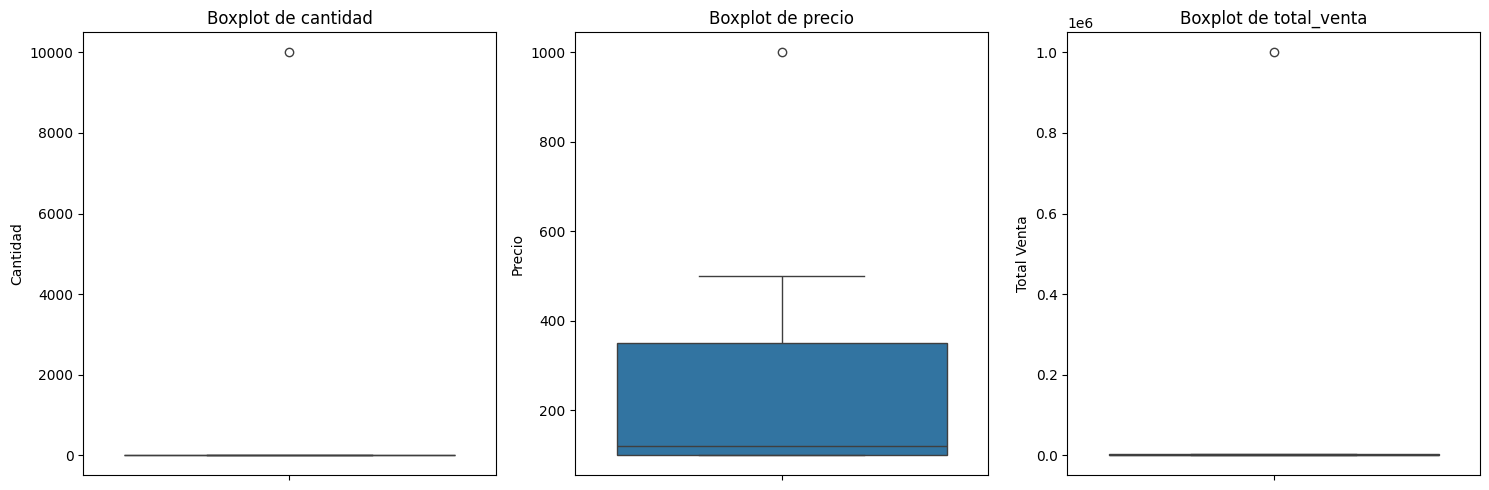

In [41]:
# Columnas para las que queremos boxplots
columns_to_plot = ['cantidad', 'precio', 'total_venta']

# Crear subplots para cada boxplot
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5)) # 1 fila, 3 columnas de gráficos

# Iterar sobre las columnas y generar un boxplot para cada una
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col.replace('_', ' ').title()) # Formatear el label del eje y

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()